Talk is cheat , Show me the code ! 
根据代码实现了线性回归的操作过程，也知道了adagrad的大致原理



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl

# matplotlib没有中文字体，动态解决
plt.rcParams['font.sans-serif'] = ['Simhei']  # 显示中文
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [2]:
x_d = np.asarray( [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]   )
y_d = np.asarray( [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]  )

## 求拟合曲线的值

In [3]:
# 定义损失函数
def loss_function(y_d,y_hat,m):
    return np.dot(y_d-y_hat, y_d-y_hat)/m/2

# 定义 b 梯度函数
def grad_b_function(y_d, y_hat, m):
    return -1 * np.sum(y_d - y_hat) / m

# 定义 w 梯度函数
def grad_w_function(y_d, y_hat, m):
    return -1 * np.dot(y_d - y_hat, x_d) / m

# linear regression
#b = -120
#w = -4
m = float(len(x_d))
b=-2
w=0.01
lr = 0.000005
iteration = 1400000

b_history = [b]
w_history = [w]
loss_history = []
import time
start = time.time()
for i in range(iteration):
    y_hat = w * x_d  +b
    loss = loss_function(y_d , y_hat , m )
    grad_b = grad_b_function(y_d, y_hat, m)
    grad_w = grad_w_function(y_d, y_hat, m)
    # update param
    b -= lr * grad_b
    w -= lr * grad_w

    b_history.append(b)
    w_history.append(w)
    loss_history.append(loss)
    if i % 50000 == 0:
        print("Step %7d, w: %0.4f, b: %4.4f, Loss: %.4f" % (i, w, b, loss))
end = time.time()
print("大约需要时间：",end-start)

Step       0, w: 0.9374, b: -1.9976, Loss: 206894.6910
Step   50000, w: 2.1697, b: -14.5410, Loss: 9310.2246
Step  100000, w: 2.2034, b: -26.2434, Loss: 8762.2094
Step  150000, w: 2.2347, b: -37.1583, Loss: 8285.4718
Step  200000, w: 2.2640, b: -47.3386, Loss: 7870.7413
Step  250000, w: 2.2913, b: -56.8339, Loss: 7509.9528
Step  300000, w: 2.3167, b: -65.6901, Loss: 7196.0903
Step  350000, w: 2.3405, b: -73.9504, Loss: 6923.0504
Step  400000, w: 2.3626, b: -81.6547, Loss: 6685.5235
Step  450000, w: 2.3832, b: -88.8406, Loss: 6478.8905
Step  500000, w: 2.4025, b: -95.5429, Loss: 6299.1334
Step  550000, w: 2.4205, b: -101.7941, Loss: 6142.7564
Step  600000, w: 2.4372, b: -107.6247, Loss: 6006.7186
Step  650000, w: 2.4529, b: -113.0629, Loss: 5888.3746
Step  700000, w: 2.4674, b: -118.1351, Loss: 5785.4230
Step  750000, w: 2.4810, b: -122.8659, Loss: 5695.8618
Step  800000, w: 2.4937, b: -127.2784, Loss: 5617.9495
Step  850000, w: 2.5055, b: -131.3940, Loss: 5550.1708
Step  900000, w: 2.5

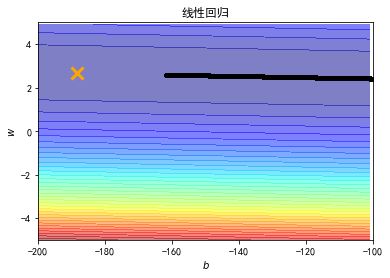

In [4]:
# 函数，画出参数变化曲线
def plot_history_of_w_b(m, b_history, w_history):
    # plot the figure
    x = np.arange(-200, -100, 1)
    y = np.arange(-5, 5, 0.1)
    Z = np.zeros((len(x), len(y)))
    X, Y = np.meshgrid(x, y)


    # loss
    for i in range(len(x)):
        for j in range(len(y)):
            b = x[i]
            w = y[j]
            Z[j][i] = 0  # meshgrid吐出结果：y为行，x为列
            for n in range(len(x_d)):
                Z[j][i] += (y_d[n] - b - w * x_d[n]) ** 2
            Z[j][i] /= len(x_d)

    plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
    plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
    plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
    plt.xlim(-200, -100)
    plt.ylim(-5, 5)
    plt.xlabel(r'$b$')
    plt.ylabel(r'$w$')
    plt.title("线性回归")
    plt.show()
plot_history_of_w_b(m,b_history,w_history)

In [7]:
# 定义损失函数
def loss_function(y_d,y_hat,m):
    return np.dot(y_d-y_hat, y_d-y_hat)/m/2

# 定义 b 梯度函数
def grad_b_function(y_d, y_hat, m):
    return -1 * np.sum(y_d - y_hat) / m

# 定义 w 梯度函数
def grad_w_function(y_d, y_hat, m):
    return -1 * np.dot(y_d - y_hat, x_d) / m

# linear regression
#b = -120
#w = -4
m = float(len(x_d))
b=-2
w=0.01
lr = 0.000005
iteration = 1400000

b_history = [b]
w_history = [w]
loss_history = []
import time
start = time.time()
for i in range(iteration):
    y_hat = w * x_d  +b
    loss = loss_function(y_d , y_hat , m )
    grad_b = grad_b_function(y_d, y_hat, m)
    grad_w = grad_w_function(y_d, y_hat, m)
    # update param
    # lr = lr**i/np.sqrt(i+1)

    b -= lr * grad_b
    w -= lr * grad_w

    b_history.append(b)
    w_history.append(w)
    loss_history.append(loss)
    if i % 50000 == 0:
        print("Step %7d, w: %0.4f, b: %4.4f, Loss: %.4f" % (i, w, b, loss))
end = time.time()
print("大约需要时间：",end-start)

Step       0, w: 0.9374, b: -1.9976, Loss: 206894.6910
Step   50000, w: 2.1697, b: -14.5410, Loss: 9310.2246
Step  100000, w: 2.2034, b: -26.2434, Loss: 8762.2094
Step  150000, w: 2.2347, b: -37.1583, Loss: 8285.4718
Step  200000, w: 2.2640, b: -47.3386, Loss: 7870.7413
Step  250000, w: 2.2913, b: -56.8339, Loss: 7509.9528
Step  300000, w: 2.3167, b: -65.6901, Loss: 7196.0903
Step  350000, w: 2.3405, b: -73.9504, Loss: 6923.0504
Step  400000, w: 2.3626, b: -81.6547, Loss: 6685.5235
Step  450000, w: 2.3832, b: -88.8406, Loss: 6478.8905
Step  500000, w: 2.4025, b: -95.5429, Loss: 6299.1334
Step  550000, w: 2.4205, b: -101.7941, Loss: 6142.7564
Step  600000, w: 2.4372, b: -107.6247, Loss: 6006.7186
Step  650000, w: 2.4529, b: -113.0629, Loss: 5888.3746
Step  700000, w: 2.4674, b: -118.1351, Loss: 5785.4230
Step  750000, w: 2.4810, b: -122.8659, Loss: 5695.8618
Step  800000, w: 2.4937, b: -127.2784, Loss: 5617.9495
Step  850000, w: 2.5055, b: -131.3940, Loss: 5550.1708
Step  900000, w: 2.5